# PRUDEX-Compass: Towards Systematic Evaluation of Reinforcement Learning in Financial Markets
This tutorial is to demonstrate an example of using PRUDEX-Compass to visualize the test result for portfolio management.

A more detailed tutorial could be found [here](https://github.com/ai-gamer/PRUDEX-Compass)

## Set up experinment environment

In [1]:
from IPython.display import clear_output
import argparse
import sys
import numpy as np
import torch
from torch import nn
import yaml
import os
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
requirements_path=module_path+"/requirements.txt"
print(requirements_path)
command="pip install -r "+requirements_path
os.system(command)
clear_output(wait=True)
! conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch
clear_output(wait=True)

failed

CondaError: KeyboardInterrupt



It is often the case that we run several random seeds on different datasets during different time periods for one specific algorithm.

However, it is sometimes difficult to evaluate the results and compare different algorithms when so much data emerges. 

Therefore, we introduce PRUDEX-Compass for a systematic evaluation.

## Performance Profile

In [2]:
from visualization.performance_profile import performance_profile
def load(path:str):
    with open(path, 'r', encoding='utf-8') as f:
        dict = eval(f.read())  
    return dict
dict_algorithm=load("visualization_data/pp.txt")
for key in dict_algorithm:
    dict_algorithm[key]=np.array(dict_algorithm[key])

In [4]:
algorithms= ['A2C','DeepTrader','PPO',"EIIE",'SAC',"IMIT",'SARL',"AlphaMix+"]
reps=2000
xlabel=r'total return score $(\tau)$'
dic='result/visualization/pp.pdf'
color=['moccasin','aquamarine','#dbc2ec','orchid','lightskyblue','lightslategrey','orange',"lightcoral"]

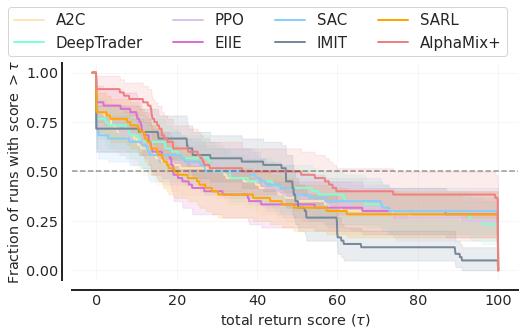

In [5]:
performance_profile.make_distribution_plot(dict_algorithm, algorithms, reps, xlabel, dic, color)

Here, we just load the test result which should be in the form of `dict_algorithm`.

It is dictionary with the names of algorithms as keys, and numpy arraies as values.

Each numpy array contains 2 dimensions: the number of the random seed and different experiment scenarios like different time periods or different datasets.

The value in the numpy array indicates a sepcific financial indicator's normalized scores under a specific run(fixed seed and scenario).

The visualization shows the distributions of the scores for different algorithms. You can specify the colors or the names of the algorithms at will.

## Rank

In [2]:
from copyreg import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils
import seaborn as sns

sns.set_style("white")
import matplotlib.patches as mpatches
import collections
import os
load_dict = np.load('visualization_data/rank.npy',allow_pickle=True).item()
from visualization.rank.rank import subsample_scores_mat,get_rank_matrix,make_rank_plot


Using algorithms: ['A2C', 'DeepTrader', 'PPO', 'EIIE', 'SAC', 'IMIT', 'SARL', 'AlphaMix+']
Using algorithms: ['A2C', 'DeepTrader', 'PPO', 'EIIE', 'SAC', 'IMIT', 'SARL', 'AlphaMix+']
Using algorithms: ['A2C', 'DeepTrader', 'PPO', 'EIIE', 'SAC', 'IMIT', 'SARL', 'AlphaMix+']
Using algorithms: ['A2C', 'DeepTrader', 'PPO', 'EIIE', 'SAC', 'IMIT', 'SARL', 'AlphaMix+']


/home/sunshuo/qml/TradeMaster/visualization/rank/rank.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, size='large')


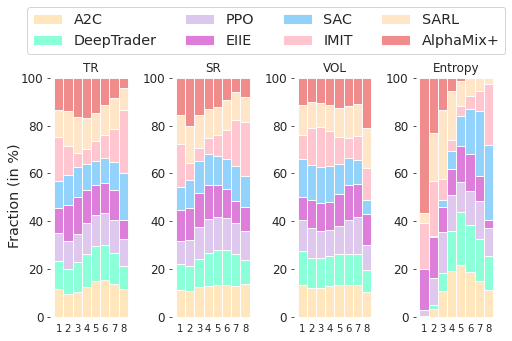

In [3]:
algorithms= ['A2C','DeepTrader','PPO',"EIIE",'SAC',"IMIT",'SARL',"AlphaMix+"]
indicator_list=['TR','SR','VOL','Entropy']
path="result/visualization/rank.pdf"
colors=['moccasin','aquamarine','#dbc2ec','orchid','lightskyblue','pink','bisque',"lightcoral"]
make_rank_plot(load_dict, algorithms, indicator_list, path, colors)

Here, we show the rank result for 4 indicators.

Unlike the dictonary we use for performance profile, here we use multiple financial indicators, and since we are comparing the rank, so no normalization is required.

The plot shows that the possibility that one algorithms could rank over all the seeds and scenarios.

## PRUDEX-Compass



<div align="center">
  <img src="result/visualization/compass.svg" width = 400 height = 400 />
</div>

if the graph does not show, please refer [here](https://github.com/ai-gamer/PRUDEX-Compass/blob/main/Compass/pictures/FInal_compass.png)

Here we show what the compass looks like.

For more information to generate such graph, please refer [here](https://github.com/ai-gamer/PRUDEX-Compass)

<table align="center">
    <tr>
        <td ><center><img src="result/visualization/pride/A2C.svg" width = 220 height = 220 />   </center></td>
        <td ><center><img src="result/visualization/pride/PPO.svg" width = 220 height = 220 /> </center></td>
        <td ><center><img src="result/visualization/pride/SAC.svg" width = 220 height = 220 /> </center></td>
    </tr>
    <tr>
     <td align="center"><center>(a) A2C</center></td><td align="center"><center>(b) PPO</center></td>      <td align="center"><center>(c) SAC</center></td>                   
    </tr>
    <tr>
        <td ><center><img src="result/visualization/pride/SARL.svg" width = 220 height = 220 /> </center></td>
        <td ><center><img src="result/visualization/pride/DeepTrader.svg" width = 220 height = 220 /> </center></td>
        <td ><center><img src="result/visualization/pride/AlphaMix.svg" width = 220 height = 220 />  </center></td>
    </tr>
    <tr>
     <td align="center"><center>(d) SARL</center></td><td align="center"><center>(e) DeepTrader</center></td>      <td align="center"><center>(f) AlphaMix+</center></td>                   
    </tr>
</table>


<div STYLE="page-break-after: always;"></div>

if the graph does not show, please refer [here](https://github.com/ai-gamer/PRUDEX-Compass/blob/main/Compass/pictures/octagon.PNG)

Here we show what the PRIDE Star looks like.

For more information to generate such graph, please refer [here](https://github.com/ai-gamer/PRUDEX-Compass)